# 05 – Unsupervised Learning (Clustering)

1. Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

2. Load dataset

In [2]:
DATA_PATH = Path("C:/Users/youss/Desktop/Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv(DATA_PATH)

# ensure results directory exists
os.makedirs("../results", exist_ok=True)

# prepare data
target = 'target' if 'target' in df.columns else df.columns[-1]
X_num = df.drop(columns=[target]).select_dtypes(include=[np.number])
y = df[target]  # keep target for later comparison

# scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

3. K-Means Clustering (Elbow Method)

C:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

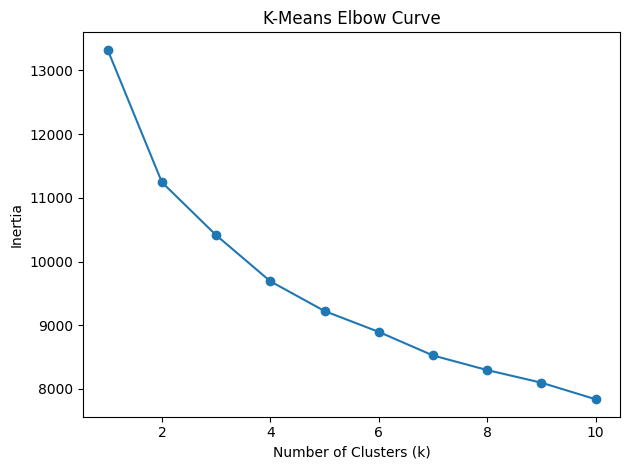

In [3]:
inertias = []
Ks = list(range(1, 11))

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(Ks, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Elbow Curve")
plt.tight_layout()
plt.savefig("../results/kmeans_elbow.png")
plt.show()

# choose k=2 (since we expect disease vs. no disease)
km = KMeans(n_clusters=2, n_init=10, random_state=42)
labels_km = km.fit_predict(X_scaled)

4. Hierarchical Clustering (Ward Linkage)

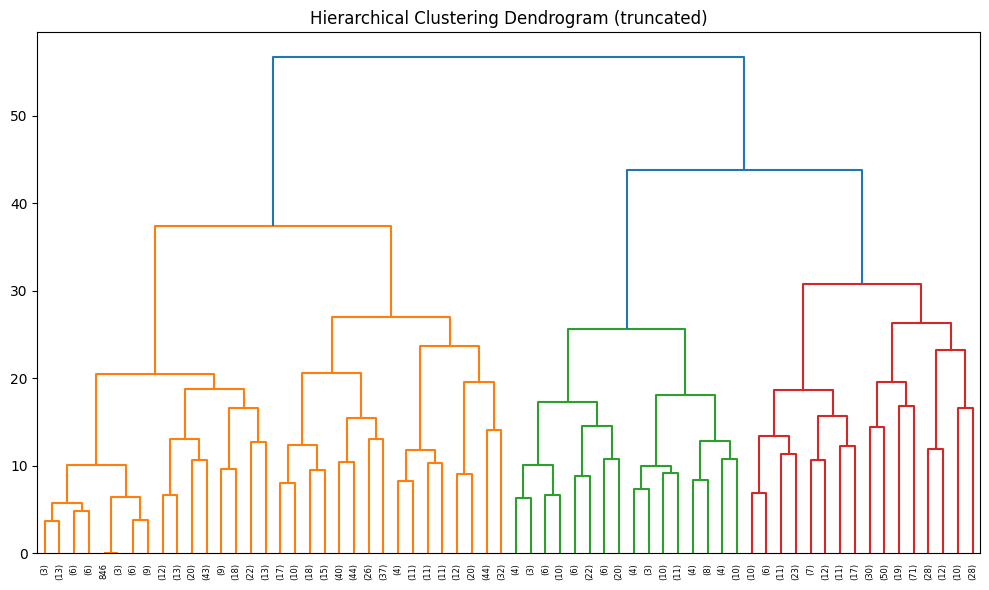

In [4]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.tight_layout()
plt.savefig("../results/hierarchical_dendrogram.png")
plt.show()

5. Compare Clusters with True Labels

In [5]:
if 'target' in df.columns:
    comp = pd.crosstab(y, labels_km, 
                       rownames=['True Target'], 
                       colnames=['KMeans Cluster'])
    print("Cluster vs True Labels:\n", comp, "\n")
    comp.to_csv("../results/cluster_vs_target.csv")

Cluster vs True Labels:
 KMeans Cluster    0    1
True Target             
0               165  334
1               488   38 

